# Customer Churn Prediction

<!--By JIBIN K-->

Task:

Develop a model to predict customer churn for a subscription- based service or business. Use historical customer data, including features like usage behavior and customer demographics, and try
algorithms like Logistic Regression, Random Forests, or Gradient Boosting to predict churn.

## Install the necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

## Load the dataset

In [2]:
file_path = r"D:\CodSoft\CODSOFT\Task 3\Churn_Modelling.csv"
data = pd.read_csv(file_path)

## Inspect the data

In [3]:
print("Data shape:", data.shape)
print("---"*30)
print("Dataset variables:", data.columns.to_list())
print("---"*30)
print("Data info: \n"); print(data.info())
print("---"*30)
print("Data description:\n", data.describe(include='all').T)
print("---"*30)
print("Data head:\n", data.head())
print("---"*30)
print("Data tail:\n", data.tail())

Data shape: (10000, 14)
------------------------------------------------------------------------------------------
Dataset variables: ['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
------------------------------------------------------------------------------------------
Data info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance

In [4]:
# Checking for missing values
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

- No missing values

In [5]:
# Checking duplicates
data.duplicated().value_counts()

False    10000
Name: count, dtype: int64

- No duplicate values

## Data Cleaning

In [6]:
# Drop Unnecessary Columns
data = data.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

In [7]:
# Encode Categorical Variables
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])  # Male=1, Female=0
data = pd.get_dummies(data, columns=['Geography'], drop_first=True, dtype=int)

In [8]:
# Checking data after cleaning
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


## Features and Target selection

In [9]:
X = data.drop('Exited', axis=1)
y = data['Exited']

## Scaling and Spliting

In [10]:
# Scale Numerical Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(f"X train shape: {X_train.shape}\nX test shape: {X_test.shape}\ny tarin shpae: {y_train.shape}\n y test shepe: {y_test.shape}")

X train shape: (8000, 11)
X test shape: (2000, 11)
y tarin shpae: (8000,)
 y test shepe: (2000,)


## Model Evaluation

### Logistic Regression

In [12]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)
print("Logistic Regression Report:")
print(classification_report(y_test, log_preds))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



### Random Forest

In [13]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
print("Random Forest Report:")
print(classification_report(y_test, rf_preds))

Random Forest Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.46      0.57       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



### Gradient Boosting

In [14]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_test)
print("Gradient Boosting Report:")
print(classification_report(y_test, gb_preds))

Gradient Boosting Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.49      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000



### ROC Curve Plot

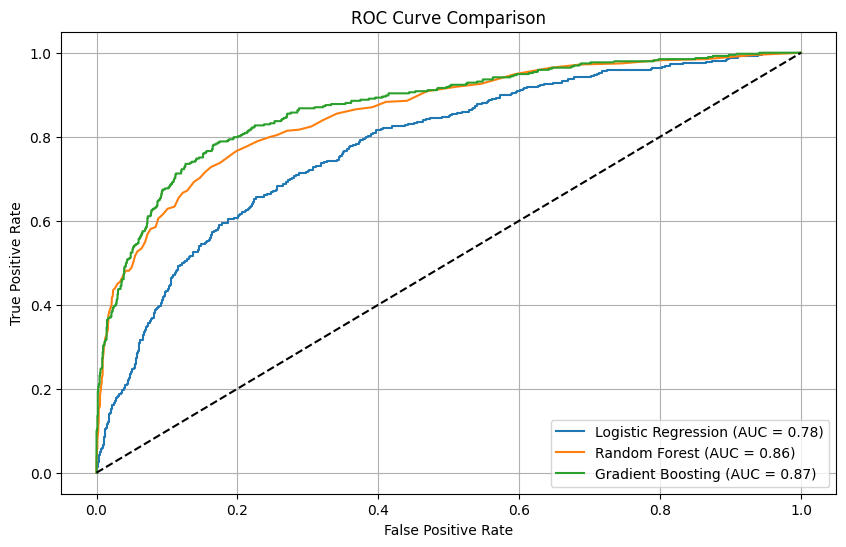

In [15]:
models = {
    "Logistic Regression": (log_model, log_preds),
    "Random Forest": (rf_model, rf_preds),
    "Gradient Boosting": (gb_model, gb_preds)
}

plt.figure(figsize=(10, 6))
for name, (model, preds) in models.items():
    probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, probs)
    auc_score = roc_auc_score(y_test, probs)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()

- Gradient Boosting performed best in terms of AUC and balanced accuracy.
- Ensemble methods (Random Forest & Gradient Boosting) performed better than Logistic Regression.